In [91]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from  sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

Business Goal
We aim to segement the Customers based on RFM so that the company can target its customers efficiently.

In [92]:
retail=pd.read_csv("OnlineRetail.csv",encoding="ISO-8859-1")

In [93]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [94]:
retail.shape

(541909, 8)

In [95]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [96]:
# Changing the datatype of Customer Id as per Business understanding

retail['CustomerID'] = retail['CustomerID'].astype(str)

In [97]:
retail.describe()

,Quantity,UnitPrice
count,541909.000000,541909.000000
mean,9.552250,4.611114
std,218.081158,96.759853
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


In [98]:
retail.isnull().sum()

InvoiceNo         0
StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID        0
Country           0
dtype: int64

In [99]:
retail.dropna(inplace=True)

In [100]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


# Step 3 : Data Preparation¶

We are going to analysis the Customers based on below 3 factors:
R (Recency): Number of days since last purchase
F (Frequency): Number of tracsactions
M (Monetary): Total amount of transactions (revenue contributed)

In [101]:
retail['Amount']=retail['Quantity']*retail['UnitPrice']

In [102]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34


In [181]:
retail_amount=retail.groupby('CustomerID')['Amount'].sum().reset_index()

In [182]:
retail_amount

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4368,18281.0,80.82
4369,18282.0,176.60
4370,18283.0,2094.88
4371,18287.0,1837.28


In [105]:
retail_frequency=retail.groupby('CustomerID')['InvoiceNo'].count().reset_index()
retail_frequency.columns=['CustomerID','Frequency']
retail_frequency.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [55]:
retail['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [56]:
retail_amount.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4373 entries, 0 to 4372
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  4373 non-null   object 
 1   Amount      4373 non-null   float64
dtypes: float64(1), object(1)
memory usage: 68.5+ KB


In [57]:
retail_frequency.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4373 entries, 0 to 4372
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  4373 non-null   object
 1   Frequency   4373 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 68.5+ KB


In [106]:
retail_amount['CustomerID']=retail_amount['CustomerID'].astype(str)# for business purpose

In [107]:
retail_amount=pd.merge(retail_amount,retail_frequency, on='CustomerID',how='inner')

In [108]:
# Convert to datetime to proper datatype

retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'],format='%d-%m-%Y %H:%M')

In [109]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [110]:
# Compute the maximum date to know the last transaction date

max_date = max(retail['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

In [111]:
# Compute the difference between max date and transaction date

retail['Diff'] = max_date - retail['InvoiceDate']
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [113]:
# Compute last transaction date to get the recency of customers

rfm_p = retail.groupby('CustomerID')['Diff'].min()
rfm_p = rfm_p.reset_index()
rfm_p.head()

,CustomerID,Diff
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [114]:
# Extract number of days only

rfm_p['Diff'] = rfm_p['Diff'].dt.days
rfm_p.head()

,CustomerID,Diff
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


In [115]:
# Merge tha dataframes to get the final RFM dataframe

rfm = pd.merge(retail_amount, rfm_p, on='CustomerID', how='inner')
rfm.columns = ['CustomerID', 'Amount', 'Frequency', 'Recency']
rfm.head()

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


Text(0.5, 0, 'Attributes')

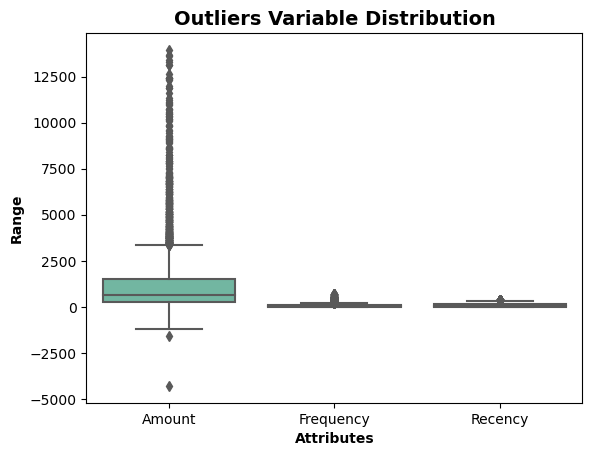

In [184]:
# Outlier Analysis of Amount Frequency and Recency

attributes = ['Amount','Frequency','Recency']
sns.boxplot(data = rfm[attributes], orient="v", palette="Set2")
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

In [185]:
# Removing (statistical) outliers for Amount

Q1=rfm['Amount'].quantile(0.05)
Q3=rfm['Amount'].quantile(0.95)
IQR=Q3-Q1
rfm=rfm[(rfm.Amount>=Q1-1.5*IQR) &(rfm.Amount<=Q3+1.5*IQR)]

# Removing (statistical) outliers for Recency

Q1=rfm['Recency'].quantile(0.05)
Q3=rfm['Recency'].quantile(0.95)
IQR=Q3-Q1
rfm=rfm[(rfm.Recency>=Q1-1.5*IQR) &(rfm.Recency<=Q3+1.5*IQR)]

# Removing (statistical) outliers for Frequency

Q1=rfm['Frequency'].quantile(0.05)
Q3=rfm['Frequency'].quantile(0.95)
IQR=Q3-Q1
rfm=rfm[(rfm.Frequency>=Q1-1.5*IQR) &(rfm.Frequency<=Q3+1.5*IQR)]

In [188]:
rfm.Frequency

0         2
1       182
2        31
3        73
4        17
       ... 
4366      9
4367     10
4368      7
4369     13
4371     70
Name: Frequency, Length: 4271, dtype: int64

Text(0.5, 0, 'Attributes')

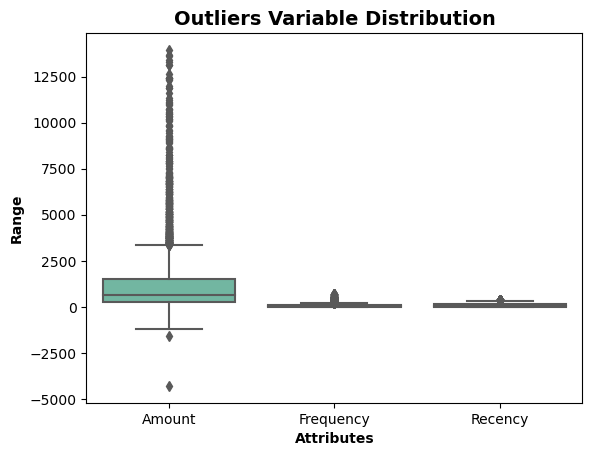

In [118]:
# Outlier Analysis of Amount Frequency and Recency

attributes = ['Amount','Frequency','Recency']
sns.boxplot(data = rfm[attributes], orient="v", palette="Set2")
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

In [186]:
rfm.head()

,CustomerID,Amount,Frequency,Recency,Cluster_Id
0,12346.0,0.00,2,325,1
1,12347.0,4310.00,182,1,2
2,12348.0,1797.24,31,74,0
3,12349.0,1757.55,73,18,0
4,12350.0,334.40,17,309,1


# Rescalin the Attribute

In [213]:
rfm_df=rfm[['Amount', 'Frequency', 'Recency']]

In [216]:
rfm_df.shape

(4271, 3)

In [217]:
rfm_df_scaled.shape

(4271, 3)

In [218]:
scaler=StandardScaler()
rfm_df_scaled=scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(4271, 3)

In [220]:
rfm_df_scaled=pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns=['Amount','Frequency','Recency']

In [221]:
rfm_df_scaled.head()

,Amount,Frequency,Recency
0,-0.759639,-0.771795,2.295613
1,1.916220,1.117217,-0.910045
2,0.356175,-0.467454,-0.187782
3,0.331534,-0.026685,-0.741847
4,-0.552027,-0.614377,2.137309


Step 4 : Building the Model

K-Means Clustering
K-means clustering is one of the simplest and popular unsupervised machine learning algorithms.

The algorithm works as follows:

First we initialize k points, called means, randomly.
We categorize each item to its closest mean and we update the mean’s coordinates, which are the averages of the items categorized in that mean so far.
We repeat the process for a given number of iterations and at the end, we have our clusters.

In [222]:
# k-means with some arbitrary k

kmeans = KMeans(n_clusters=4, max_iter=50,verbose=1,n_init=1)
kmeans.fit(rfm_df_scaled)

Initialization complete
Iteration 0, inertia 3548.2774450097513
Iteration 1, inertia 3318.3105716951623
Iteration 2, inertia 3309.481481854991
Iteration 3, inertia 3307.9698231161346
Iteration 4, inertia 3307.430663935327
Iteration 5, inertia 3307.223797222184
Iteration 6, inertia 3307.0522001811796
Converged at iteration 6: center shift 4.0610173645102155e-05 within tolerance 9.999999999999996e-05.


KMeans(max_iter=50, n_clusters=4, n_init=1, verbose=1)

In [130]:
kmeans.labels_

array([1, 0, 2, ..., 1, 2, 2])

In [223]:
kmeans.cluster_centers_

array([[-0.52131478, -0.52684199,  1.5672327 ],
       [ 0.82538211,  0.89684588, -0.61737895],
       [-0.34537186, -0.35552995, -0.43734925],
       [ 2.97772799,  2.85879523, -0.73593642]])

In [224]:
kmeans.feature_names_in_

array(['Amount', 'Frequency', 'Recency'], dtype=object)

In [225]:
kmeans.n_clusters

4

In [226]:
kmeans.get_params

<bound method BaseEstimator.get_params of KMeans(max_iter=50, n_clusters=4, n_init=1, verbose=1)>

In [135]:
kmeans.n_features_in_

3

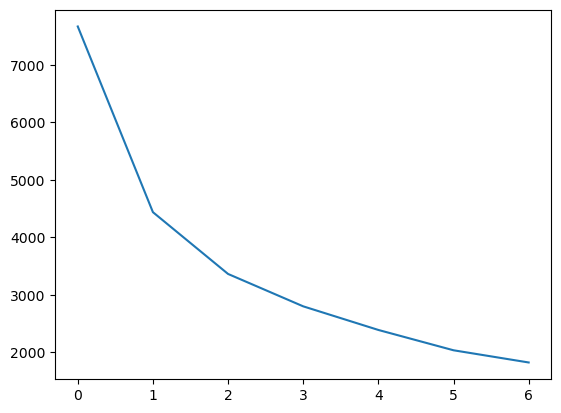

In [136]:
# Elbow-curve/SSD

ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
plt.plot(ssd)

In [227]:
# silhouette score
silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_av
    silhouette_score(rfm_df_scaled)

SyntaxError: invalid syntax (4012041880.py, line 4)

In [139]:
silhouette_score(rfm_df_scaled,labels=)

TypeError: silhouette_score() missing 1 required positional argument: 'labels'

In [228]:
kmeans.inertia_

3306.9988681535933

In [229]:
kmeans.score(rfm_df_scaled)

-3306.998868153594

In [147]:
from sklearn.cluster import MiniBatchKMeans

In [157]:
minibatch_kmeans=MiniBatchKMeans(n_clusters=2,random_state=42)
minibatch_kmeans.fit(rfm_df_scaled)

C:\Users\MODASUD\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


MiniBatchKMeans(n_clusters=2, random_state=42)

In [153]:
from sklearn.metrics import silhouette_score

silhouette_score(rfm_df_scaled,kmeans.labels_)

0.3605442776429987

In [158]:
from sklearn.metrics import silhouette_score

silhouette_score(rfm_df_scaled,minibatch_kmeans.labels_)

0.5586467559377808

In [161]:
# Silhouette analysis

range_n_cluster=[2,3,4,5,6,7,8,9]

for num in range_n_cluster:
    kmeans=KMeans(n_clusters=num,max_iter=50)
    kmeans.fit(rfm_df_scaled)
    cluster_labels=kmeans.labels_
    
    silhouette_score_avg=silhouette_score(rfm_df_scaled,cluster_labels)
    
    print("For n_cluster={0}, the silhouette score is {1}".format(num,silhouette_score_avg))

For n_cluster=2, the silhouette score is 0.5417169199484028
For n_cluster=3, the silhouette score is 0.5087593101969973
For n_cluster=4, the silhouette score is 0.4814436463810725
For n_cluster=5, the silhouette score is 0.46462518625510935
For n_cluster=6, the silhouette score is 0.41800962579345613
For n_cluster=7, the silhouette score is 0.41584682960156644
For n_cluster=8, the silhouette score is 0.3948143260873488
For n_cluster=9, the silhouette score is 0.38708069055548266


In [164]:
# Final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=3)

In [165]:
# assign the label
rfm['Cluster_Id'] = kmeans.labels_
rfm.head()

,CustomerID,Amount,Frequency,Recency,Cluster_Id
0,12346.0,0.00,2,325,1
1,12347.0,4310.00,182,1,2
2,12348.0,1797.24,31,74,0
3,12349.0,1757.55,73,18,0
4,12350.0,334.40,17,309,1


<AxesSubplot:xlabel='Cluster_Id', ylabel='Amount'>

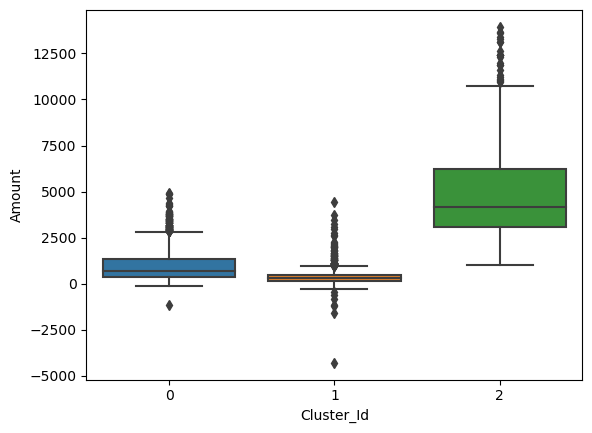

In [166]:
# Box plot to visualize Cluster Id vs Frequency

sns.boxplot(x='Cluster_Id', y='Amount', data=rfm)

<AxesSubplot:xlabel='Cluster_Id', ylabel='Frequency'>

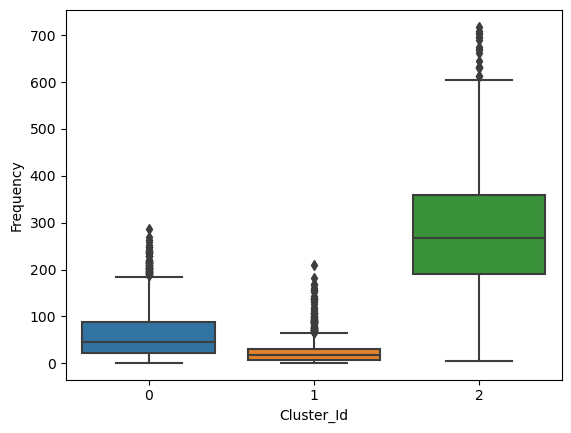

In [167]:
# Box plot to visualize Cluster Id vs Frequency

sns.boxplot(x='Cluster_Id', y='Frequency', data=rfm)

<AxesSubplot:xlabel='Cluster_Id', ylabel='Recency'>

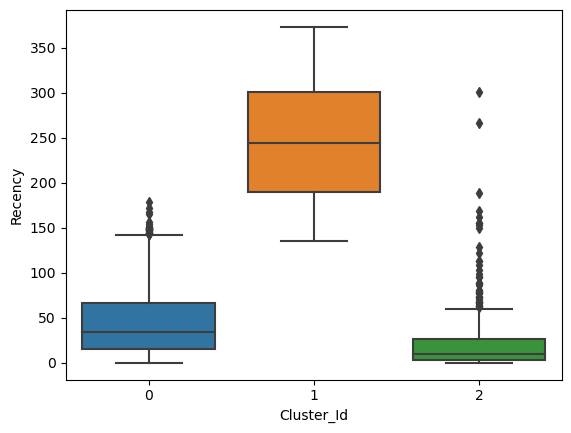

In [168]:
# Box plot to visualize Cluster Id vs Frequency

sns.boxplot(x='Cluster_Id', y='Recency', data=rfm)

Agglomerative Hierarchical Clustering

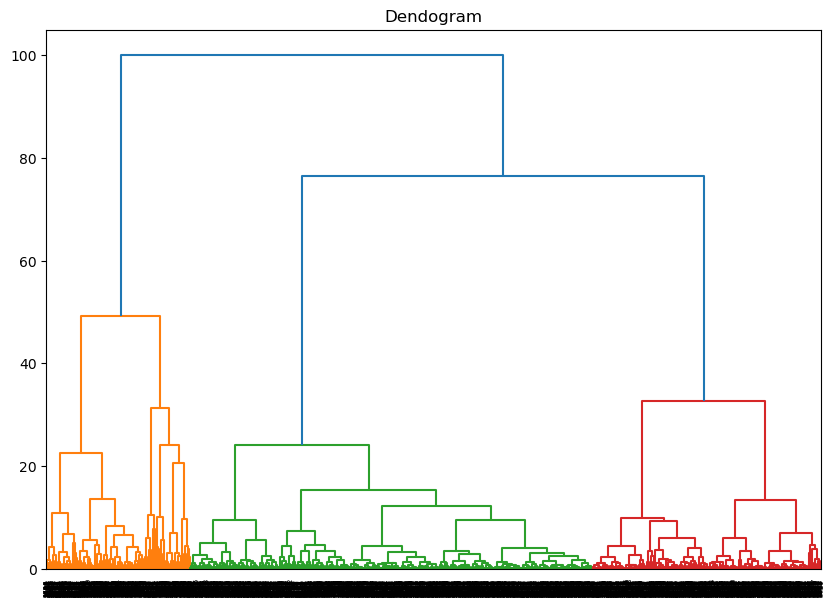

In [169]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10,7))
plt.title("Dendogram")
dend=shc.dendrogram(shc.linkage(rfm_df_scaled,method='ward'))

In [170]:
from  sklearn.cluster import AgglomerativeClustering

cluster= AgglomerativeClustering(n_clusters=4, affinity='euclidean',linkage='ward')
labels_=cluster.fit_predict(rfm_df_scaled)

In [171]:
labels_

array([0, 3, 2, ..., 0, 2, 2], dtype=int64)

In [176]:
rfm_df_scaled

,Amount,Frequency,Recency
0,-0.721139,-0.753083,2.301868
1,1.719726,1.041594,-0.906269
2,0.296685,-0.463941,-0.183448
3,0.274207,-0.045183,-0.737941
4,-0.531759,-0.603527,2.143441
...,...,...,...
4289,-0.622655,-0.683290,-0.193350
4290,-0.618860,-0.673320,1.826588
4291,-0.675368,-0.703231,0.866128
4292,-0.621126,-0.643408,-0.846859


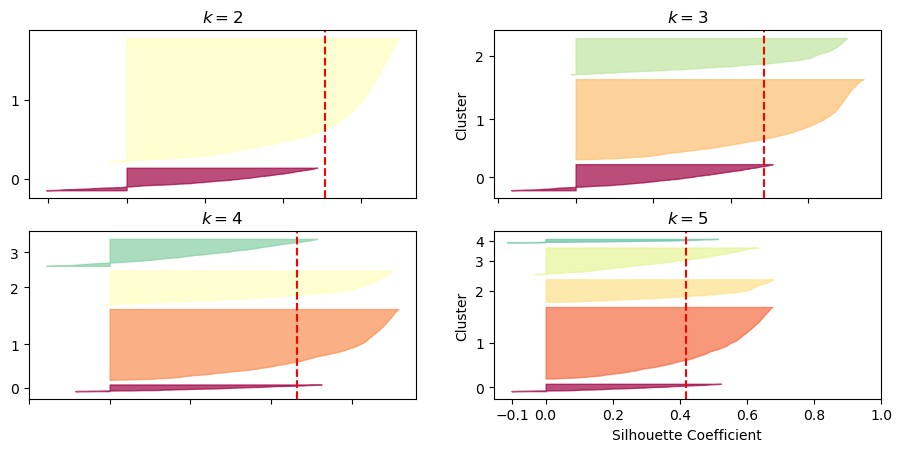

In [194]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

kmeans_per_k = [KMeans(n_clusters=k, n_init=10, random_state=42).fit(rfm_df_scaled)
                for k in range(2, 11)]
silhouette_scores = [silhouette_score(rfm_df_scaled, model.labels_)
                     for model in kmeans_per_k[1:]]
plt.figure(figsize=(11, 10))

for k in (2, 3, 4, 5):
    plt.subplot(4, 2, k - 1)

    y_pred = kmeans_per_k[k - 1].labels_
    
    silhouette_coefficients = silhouette_samples(rfm_df_scaled, y_pred)

    padding = len(rfm_df_scaled) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = plt.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")

    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title(f"$k={k}$")

plt.show()

In [199]:
df2

,Amount,Frequency,Recency,Cluster,PC1,PC2
0,-0.721139,-0.753083,2.301868,2,-2.592095,1.287397
1,1.719726,1.041594,-0.906269,0,2.839997,0.189069
2,0.296685,-0.463941,-0.183448,1,0.125253,-0.249538
3,0.274207,-0.045183,-0.737941,1,0.571350,-0.456624
4,-0.531759,-0.603527,2.143441,2,-2.355093,1.338485
...,...,...,...,...,...,...
4289,-0.622655,-0.683290,-0.193350,1,-0.423447,-0.809793
4290,-0.618860,-0.673320,1.826588,2,-2.288255,1.043643
4291,-0.675368,-0.703231,0.866128,2,-1.895757,0.334591
4292,-0.621126,-0.643408,-0.846859,1,-0.107383,-1.245243


In [231]:
rfm_df_scaled.shape

(4271, 3)

In [230]:
rfm_df.shape

(4271, 3)

In [232]:
from sklearn.decomposition import PCA

kmeans = KMeans(n_clusters= 3, random_state=42)  #change value of n_clusters
cluster_labels = kmeans.fit_predict(rfm_df_scaled)
rfm_df['Cluster'] = cluster_labels
rfm_df.to_excel('Clustered_data.xlsx', index = False)

C:\Users\MODASUD\AppData\Local\Temp\ipykernel_21656\1877333801.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_df['Cluster'] = cluster_labels


In [233]:
df2 = pd.read_excel('Clustered_data.xlsx')

scaler1 = StandardScaler()
normalized_data = scaler1.fit_transform(df2)

pca = PCA(n_components=2)
pca_data = pca.fit_transform(normalized_data)

df2['PC1'] = pca_data[:, 0]
df2['PC2'] = pca_data[:, 1]

In [234]:
cluster_labels

array([1, 2, 0, ..., 1, 0, 0])

In [237]:
kmeans.cluster_centers_

array([[-0.19945629, -0.19790139, -0.47522267],
       [-0.52061905, -0.52790102,  1.53697681],
       [ 1.97188427,  1.97849211, -0.68491105]])

In [238]:
kmeans.cluster_centers_[:,0]

array([-0.19945629, -0.52061905,  1.97188427])

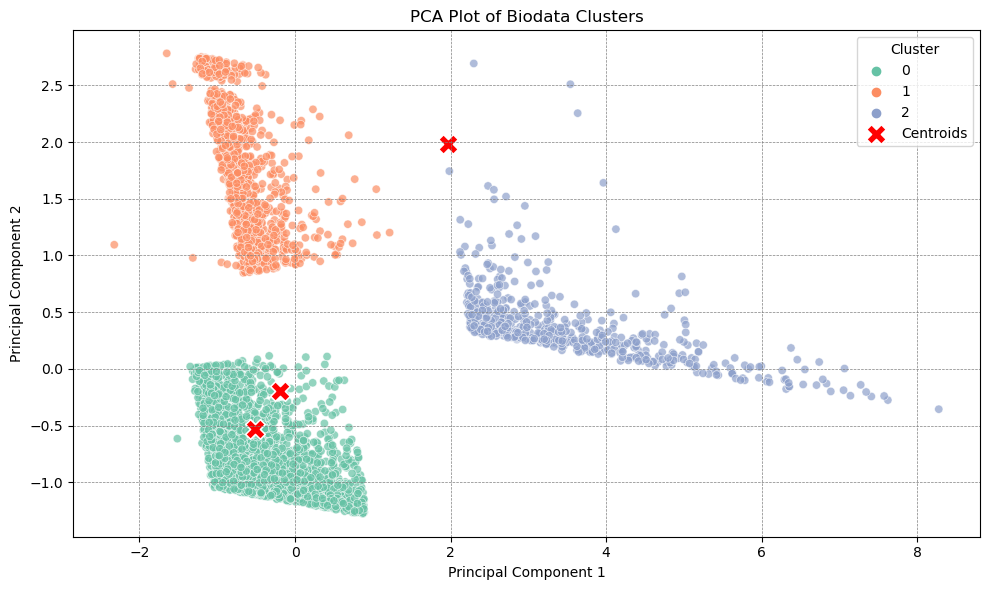

In [236]:
cluster_palette = sns.color_palette("Set2", n_colors = len(df2['Cluster'].unique()))

plt.figure(figsize = (10, 6))
sns.scatterplot(x = df2['PC1'], y = df2['PC2'], hue = df2['Cluster'], palette = cluster_palette, alpha = 0.7)

plt.title("PCA Plot of Biodata Clusters")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.grid(True)
plt.tight_layout()

#customize legend and grid

plt.legend(title="Cluster", bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(color='gray', linestyle='--', linewidth=0.5)

sns.scatterplot(x = kmeans.cluster_centers_[:,0], y = kmeans.cluster_centers_[:,1], marker = 'X', s = 200, color = 'red', label = 'Centroids')
plt.legend(title = 'Cluster')


plt.show()